# 分析问题：
## 泰坦尼克号中的部分幸存者的幸存情况进行分析
### 1、社会地位对从泰坦尼克号上幸存的影响
### 2、性别对泰坦尼克号上幸存的影响
### 3、登船不同的地区，对幸存的影响
## 以下是数据的一些参考
    


In [ ]:
#########首先进行加载数据##############

In [2]:
import pandas as pd
from pandas import Series,DataFrame
data=pd.read_csv('titanic-data.csv',usecols=[1,2,4,11])

#    
####加载文件到ipython中并初始化，由于上面的得知自变量个因变量的相关信息在这里仅仅导入了相关的列


In [3]:
####对数据进行统计
data.count()

Survived    891
Pclass      891
Sex         891
Embarked    889
dtype: int64

In [4]:
######数据包含空值#######
######将空值的数据清理掉不做计算，
data['Sex']

0        male
1      female
2      female
3      female
4        male
5        male
6        male
7        male
8      female
9      female
10     female
11     female
12       male
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25     female
26       male
27       male
28     female
29       male
        ...  
861      male
862    female
863    female
864      male
865    female
866    female
867      male
868      male
869      male
870      male
871    female
872      male
873      male
874    female
875    female
876      male
877      male
878      male
879    female
880    female
881      male
882    female
883      male
884      male
885    female
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [5]:
###############数据清洗
def Place_char(dat):
    if dat == 1 :
        dat='Upper'
        return dat
    if dat == 2:
        dat='Middle'
        return dat
    if dat == 3:
        dat='Lower'
        return dat
##对应的社会地位装换为对应的字符串C = Cherbourg, Q = Queenstown, S = Southampton
def Embarked_char(dat):
    if dat is 'C' :
        dat='Cherbourg'
        return dat
    if dat is 'Q':
        dat='Queenstown'
        return dat
    if dat is 'S':
        dat='Southampton'
        return dat
data['Pclass']=data['Pclass'].apply(Place_char)

data['Embarked']=data['Embarked'].apply(Embarked_char)

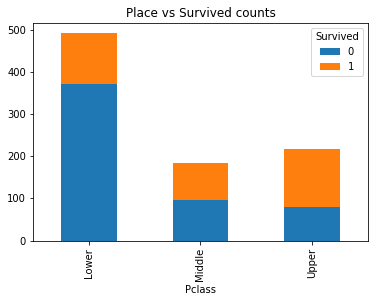

In [6]:
### Pclass VS Survived

%matplotlib inline
import matplotlib.pyplot as plt
data.groupby(['Pclass','Survived']).Survived.count().unstack().plot(kind='bar',stacked='True',title='Place vs Survived counts')

## 不同Embarked的生还和遇难者人数条形图

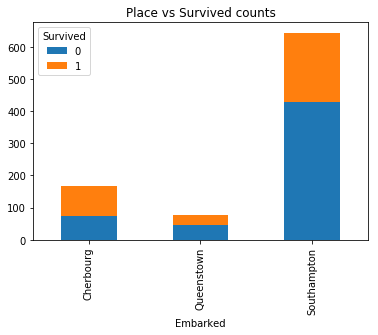

In [5]:
### Pclass VS Survived
%matplotlib inline
import matplotlib.pyplot as plt
data.groupby(['Embarked','Survived']).Survived.count().unstack().plot(kind='bar',stacked='True',title='Place vs Survived counts')

### 上述图片中可知三个港口的幸存的人数

In [7]:
data.groupby(['Embarked','Survived']).Survived.count()['Southampton']

Survived
0    427
1    217
Name: Survived, dtype: int64

In [8]:
trin_sex=data.groupby([ 'Sex']).Survived.count()

In [9]:
trin_sex


Sex
female    314
male      577
Name: Survived, dtype: int64

plt.bar(X-bar, y-bar)  

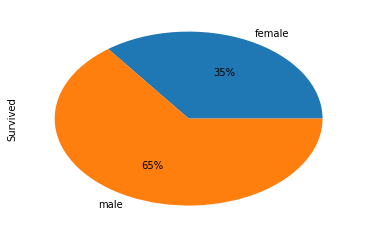

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
trin_sex.plot(kind='pie',autopct='%.0f%%')


## 单纯性别做分析好像没有什么有用的价值
## 这里可知样本中男性占了绝大部分
## 我打算进一步查看性别的具体的幸存情况


In [11]:
trin_sex_save=data.groupby([ 'Sex']).Survived.mean()

<Container object of 2 artists>

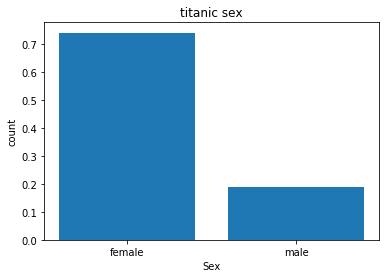

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.title(u"titanic sex")
plt.xlabel(u'Sex')
plt.ylabel(u'count')
plt.bar(trin_sex_save.index, trin_sex_save)  

### 单纯性别做分析好像没有什么有用的价值
### 这里可知样本中男性占了绝大部分
### 我打算一如地区中的性别占比来进行分析
计算发现样本中的女性幸存率更高。
下面引入登船的地区进行分析数据

In [13]:
###########按地区和性别进行分组统计
area_Sex_Save=data.groupby(['Embarked', 'Sex']).Survived.mean()

In [14]:
###计算地区实际登船的人数
area_Sex_Save_count=data.groupby(['Embarked', 'Sex']).Survived.count()

In [20]:
print (area_Sex_Save)
print(area_Sex_Save_count)


Embarked     Sex   
Cherbourg    female    0.876712
             male      0.305263
Queenstown   female    0.750000
             male      0.073171
Southampton  female    0.689655
             male      0.174603
Name: Survived, dtype: float64
Embarked     Sex   
Cherbourg    female     73
             male       95
Queenstown   female     36
             male       41
Southampton  female    203
             male      441
Name: Survived, dtype: int64


In [16]:
area_Sex_Save_count

Embarked     Sex   
Cherbourg    female     73
             male       95
Queenstown   female     36
             male       41
Southampton  female    203
             male      441
Name: Survived, dtype: int64

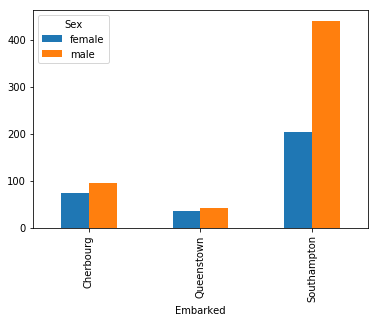

In [18]:
###Embarked and Sex VS count
%matplotlib inline
import matplotlib.pyplot as plt
area_Sex_Save_count.unstack().plot(kind='bar',title='')


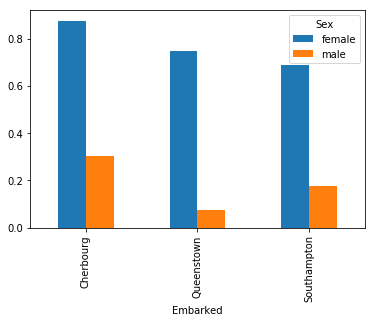

In [21]:
###Embarked and Sex VS Survived 
%matplotlib inline
import matplotlib.pyplot as plt
area_Sex_Save.unstack().plot(kind='bar',title='embarked VS sex VS survived')


In [24]:
area=data.groupby(['Pclass','Embarked','Sex']).Survived.mean()


In [39]:
area_save=data.groupby(['Pclass','Embarked','Sex']).Survived.count()
print(area_save)

Pclass  Embarked     Sex   
Lower   Cherbourg    female     23
                     male       43
        Queenstown   female     33
                     male       39
        Southampton  female     88
                     male      265
Middle  Cherbourg    female      7
                     male       10
        Queenstown   female      2
                     male        1
        Southampton  female     67
                     male       97
Upper   Cherbourg    female     43
                     male       42
        Queenstown   female      1
                     male        1
        Southampton  female     48
                     male       79
Name: Survived, dtype: int64


In [117]:
area_save.unstack().unstack(0)['male']

Pclass,Lower,Middle,Upper
Embarked,,,
Cherbourg,43,10,42
Queenstown,39,1,1
Southampton,265,97,79


ValueError: shape mismatch: objects cannot be broadcast to a single shape

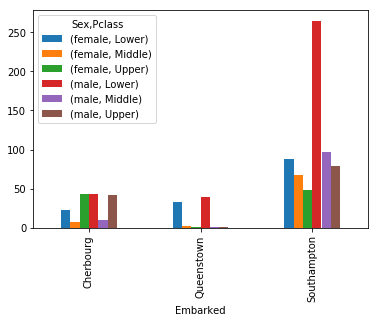

In [106]:
 ###Embarked and Sex VS Survived 
%matplotlib inline
import matplotlib.pyplot as plt
area_save.unstack().unstack(0).plot(kind='bar')
plt.bar(area_save.unstack().unstack(0).index,area_save.unstack().unstack(0),weight=1)

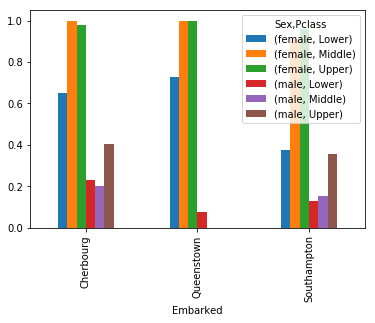

In [99]:
###Embarked and Sex VS Survived 
%matplotlib inline
import matplotlib.pyplot as plt
area.unstack().unstack(0).plot(kind='bar')

In [62]:
place_have_count=data.groupby('Pclass').Survived.count()

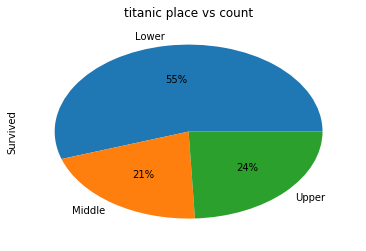

In [63]:
####titanic place vs count
%matplotlib inline
import matplotlib.pyplot as plt
plt.title(u"titanic place vs count")
place_have_count.plot(kind='pie',autopct='%.0f%%')

### 冲上图数据中可知泰坦尼克号上的社会等级为中层的人最少

## 1、于使用的数据集是数据在相关数据中进行分析的数据。数据因为缺少少量的数据导致数据存在一些问题，比如我获取的数据中Embarked存在着两条数据为空值的现象。而在数据分析的过程中，因为该数据存在这样活着那样的问题，导致数据可能在分析的过程中存在着一些问题，但是在这里暂时只是用数据的相关数目进行统计数据相关问题。
## 2、对于这个样本来说总体数据在891条，而如果对数据进行数据的分类的话，会发现数据在登船的地点上存在着一些细微的差别，这些数据会做为分析的样本来进行相关的事物分析。故在计算时使用的是相关的数据进行计算比如（登船的地点和实际的社会地位），诸如此类的数据的相关的情况进行分析。
## 、因为在数据分析的过程中需要循序渐进的添加变量进行分析，变量的添加会造成结果的变化，所以我使用了4了变量进行分析数据的情况，在这些数据中由于基础数据就是从总体样本中进行随机取样获取到的相关的数据，样本的数据表示总体的数据本身就存在相关的问题， 需要使用这些数据进行分析，比如，由于
## 4、由于数据我仅仅使用4中变量进行分析从泰坦尼克号上幸存的概率，但同时没有使用的数据比如在船上使用舱室可能会影响从泰坦尼克号上幸存。再此次数据分析的过程中，我使用了数据比较全面的数据进行分析数据变化趋势（说白了就是揽了，不想对比如票这种情况的数据，需要大批量进行数据清洗的数据进行抛弃，选用了只需要见得数据进行分析的数据进行分析。）
## 5、由于数据统计较为直观的可以看出各项变量影响的幸存情况，所以我暂时没有使用相关的偏差验证和不确定性的验证

# 总的分析
## 从海难中幸存与社会地位成正相关，社会以为越高幸存率越高。同时在数据中发现女性相对于男性更容易从海难中幸存。

## 同时在数据样本中可知Cherbourg这个地方等船的人较多